In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.metrics import mean_absolute_error

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
import pickle

## 1.1 Daten

In [6]:
df = pd.read_csv("autoscout24.csv")

In [7]:
df

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


## 1.2 Analyse
### Wieviele Autos wurden verkauft? ¨Uber welchen Zeitraum?

In [8]:
print(f"{df.shape[0]} Autos wurden verkauft")

46405 Autos wurden verkauft


In [9]:
n = df["year"].max() - df["year"].min()
print(f"Im Zeitraum über {n} Jahren")

Im Zeitraum über 10 Jahren


### Welche Marken sind erfasst?

In [10]:
df["make"].unique()

array(['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota',
       'Opel', 'Mazda', 'Ford', 'Mercedes-Benz', 'Chevrolet', 'Audi',
       'Fiat', 'Kia', 'Dacia', 'MINI', 'Hyundai', 'Skoda', 'Citroen',
       'Infiniti', 'Suzuki', 'SsangYong', 'smart', 'Cupra', 'Volvo',
       'Jaguar', 'Porsche', 'Nissan', 'Honda', 'Lada', 'Mitsubishi',
       'Others', 'Lexus', 'Jeep', 'Maserati', 'Bentley', 'Land', 'Alfa',
       'Subaru', 'Dodge', 'Microcar', 'Lamborghini', 'Baic', 'Tesla',
       'Chrysler', '9ff', 'McLaren', 'Aston', 'Rolls-Royce', 'Alpine',
       'Lancia', 'Abarth', 'DS', 'Daihatsu', 'Ligier', 'Ferrari',
       'Caravans-Wohnm', 'Aixam', 'Piaggio', 'Zhidou', 'Morgan',
       'Maybach', 'Tazzari', 'Trucks-Lkw', 'RAM', 'Iveco', 'DAF',
       'Alpina', 'Polestar', 'Brilliance', 'FISKER', 'Cadillac',
       'Trailer-Anhänger', 'Isuzu', 'Corvette', 'DFSK', 'Estrima'],
      dtype=object)

### Existieren Korrelationen zwischen den (numerischen) Features?

C:\Users\natal\AppData\Local\Temp\ipykernel_19404\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

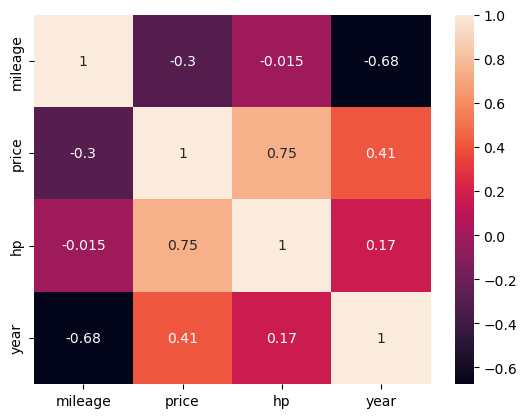

In [11]:
sns.heatmap(df.corr(), annot=True)

### Gibt es Veränderungen über die Jahre?

In [12]:
all_mean_prices = []
for i in range(2011, 2022):
    new_df = df[df["year"] == i]
    price_mean = new_df["price"].mean().round(2)
    print(f"Durchschnittspreis im Jahr {i}: {price_mean}€")
    all_mean_prices.append(price_mean)

Durchschnittspreis im Jahr 2011: 7021.26€
Durchschnittspreis im Jahr 2012: 8243.46€
Durchschnittspreis im Jahr 2013: 9234.71€
Durchschnittspreis im Jahr 2014: 9928.27€
Durchschnittspreis im Jahr 2015: 11115.86€
Durchschnittspreis im Jahr 2016: 12750.48€
Durchschnittspreis im Jahr 2017: 18491.07€
Durchschnittspreis im Jahr 2018: 22216.28€
Durchschnittspreis im Jahr 2019: 24892.67€
Durchschnittspreis im Jahr 2020: 28840.21€
Durchschnittspreis im Jahr 2021: 29264.31€


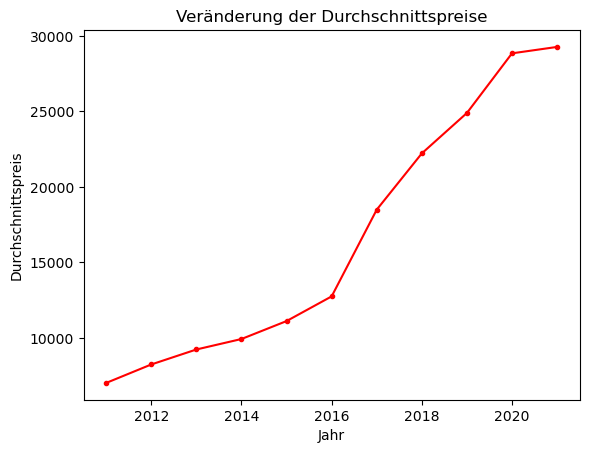

In [13]:
plt.plot(range(2011, 2022), all_mean_prices, ".r-")
plt.title("Veränderung der Durchschnittspreise")
plt.xlabel("Jahr")
plt.ylabel("Durchschnittspreis")
plt.show()

### Wie korreliert der Preis imit dem Jahr der Registrierung für verschiedene Marken?

In [14]:
all_brands = df["make"].unique()

In [15]:
# Es gibt viel zu viele Marken, deswegen plotten wir nur die, die mehr als 1000 Mal verkauft wurden.
all_brands_more_1000 = []
for i in all_brands:
    n = df[df["make"] == i].shape[0]
    print(f"Es wurden insgesamt {n} {i}-Autos in all den Jahren verkauft")
    if n > 1000:
        all_brands_more_1000.append(i)

Es wurden insgesamt 2405 BMW-Autos in all den Jahren verkauft
Es wurden insgesamt 6931 Volkswagen-Autos in all den Jahren verkauft
Es wurden insgesamt 1924 SEAT-Autos in all den Jahren verkauft
Es wurden insgesamt 2830 Renault-Autos in all den Jahren verkauft
Es wurden insgesamt 1232 Peugeot-Autos in all den Jahren verkauft
Es wurden insgesamt 1275 Toyota-Autos in all den Jahren verkauft
Es wurden insgesamt 4814 Opel-Autos in all den Jahren verkauft
Es wurden insgesamt 714 Mazda-Autos in all den Jahren verkauft
Es wurden insgesamt 4442 Ford-Autos in all den Jahren verkauft
Es wurden insgesamt 2354 Mercedes-Benz-Autos in all den Jahren verkauft
Es wurden insgesamt 223 Chevrolet-Autos in all den Jahren verkauft
Es wurden insgesamt 2684 Audi-Autos in all den Jahren verkauft
Es wurden insgesamt 1700 Fiat-Autos in all den Jahren verkauft
Es wurden insgesamt 1055 Kia-Autos in all den Jahren verkauft
Es wurden insgesamt 715 Dacia-Autos in all den Jahren verkauft
Es wurden insgesamt 469 MINI-A

In [16]:
all_brands_more_1000

['BMW',
 'Volkswagen',
 'SEAT',
 'Renault',
 'Peugeot',
 'Toyota',
 'Opel',
 'Ford',
 'Mercedes-Benz',
 'Audi',
 'Fiat',
 'Kia',
 'Hyundai',
 'Skoda']

Erstmal eine Grafik, wie der Preis und das Registrierungsjahr korrelieren

In [17]:
all_mean_prices_for_brands ={} # Dictionary für alle Durchschnittspreise nach Registrierungsjahren und Marken

for i in all_brands_more_1000:
    new_df = df[df["make"] == i]
    
    all_prices = []
    for j in range(2011, 2022):
        new_df_year = new_df[new_df["year"] == j]
        price_mean = new_df_year["price"].mean()
        if price_mean is not None:
            price_mean = round(price_mean, 2)
        all_prices.append(price_mean)
        
    all_mean_prices_for_brands[i] = all_prices

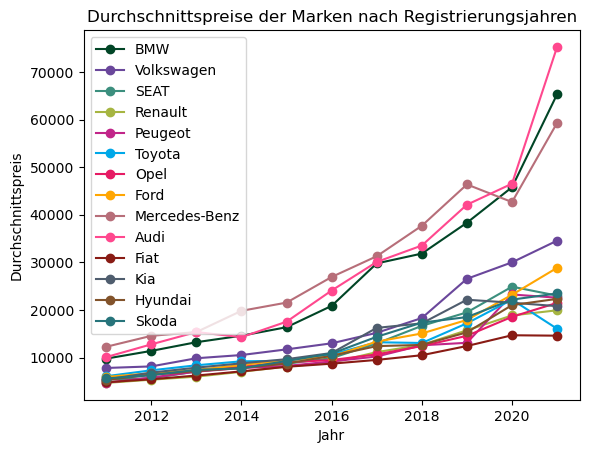

In [18]:
colors = ['#014526', '#6a479b', '#3c8f7e', '#a6b541', '#c12589', '#00a8e8', '#e61b64', '#ffa602', '#b76e79', '#ff488e', '#891b14', '#4f5d6e', '#82532b', '#27747b']
for i, (key, value) in enumerate(all_mean_prices_for_brands.items()):
    plt.plot(range(2011, 2022), value, color=colors[i], marker='o', label=key)

plt.title("Durchschnittspreise der Marken nach Registrierungsjahren")
plt.xlabel("Jahr")
plt.ylabel("Durchschnittspreis")
plt.legend()
plt.show()

Nun will ich für alle Marken, die über 1000 Mal verkauft wurden, die Korrellation zwischen dem Preis und der Anzahl an gefahrenen Kilometer sehen.

In [19]:
n = df[df["mileage"] < 300000].shape[0] / df.shape[0] * 100 
print(f"{n}% aller verkauften Autos sind weniger als 300.000 Kilometer gefahren")

99.5453076177136% aller verkauften Autos sind weniger als 300.000 Kilometer gefahren


In [20]:
all_mean_prices_for_brands_and_mil ={} # Dictionary für alle Durchschnittspreise nach Kilometer und Marken

for i in all_brands_more_1000:
    new_df = df[df["make"] == i]
    
    all_prices = []
    for j in range(0, 300000, 1000):
        new_df_mil = new_df[new_df["mileage"] >= j]
        price_mean = new_df_mil["price"].mean()
        if price_mean is not None:
            price_mean = round(price_mean, 2)
        all_prices.append(price_mean)
        
    all_mean_prices_for_brands_and_mil[i] = all_prices

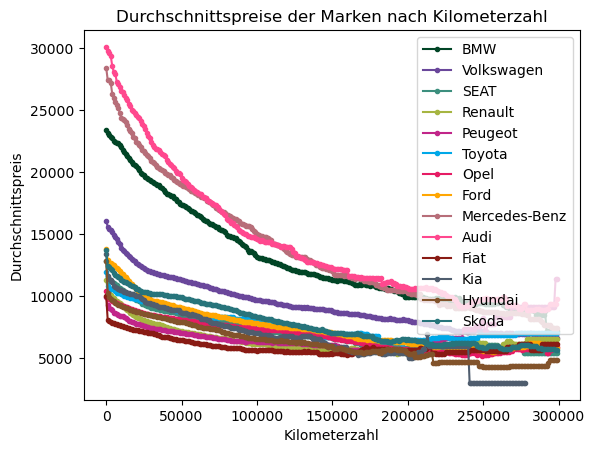

In [21]:
colors = ['#014526', '#6a479b', '#3c8f7e', '#a6b541', '#c12589', '#00a8e8', '#e61b64', '#ffa602', '#b76e79', '#ff488e', '#891b14', '#4f5d6e', '#82532b', '#27747b']
for i, (key, value) in enumerate(all_mean_prices_for_brands_and_mil.items()):
    plt.plot(range(0, 300000, 1000), value, color=colors[i], marker='.', label=key)

plt.title("Durchschnittspreise der Marken nach Kilometerzahl")
plt.xlabel("Kilometerzahl")
plt.ylabel("Durchschnittspreis")
plt.legend()
plt.show()

## 1.3 Machine Learning
### Die Autos welcher 5 Hersteller wurden am häufigsten verkauft?

In [22]:
all_brands = df["make"].unique() # Liste aller Marken
all_sales = {}                   # Dictionary zum speichern aller Sales
for i in all_brands:
    n = df[df["make"] == i].shape[0]
    all_sales[i] = n

In [23]:
all_sales

{'BMW': 2405,
 'Volkswagen': 6931,
 'SEAT': 1924,
 'Renault': 2830,
 'Peugeot': 1232,
 'Toyota': 1275,
 'Opel': 4814,
 'Mazda': 714,
 'Ford': 4442,
 'Mercedes-Benz': 2354,
 'Chevrolet': 223,
 'Audi': 2684,
 'Fiat': 1700,
 'Kia': 1055,
 'Dacia': 715,
 'MINI': 469,
 'Hyundai': 1888,
 'Skoda': 2889,
 'Citroen': 957,
 'Infiniti': 15,
 'Suzuki': 361,
 'SsangYong': 37,
 'smart': 974,
 'Cupra': 65,
 'Volvo': 804,
 'Jaguar': 126,
 'Porsche': 244,
 'Nissan': 753,
 'Honda': 182,
 'Lada': 33,
 'Mitsubishi': 409,
 'Others': 25,
 'Lexus': 48,
 'Jeep': 158,
 'Maserati': 12,
 'Bentley': 15,
 'Land': 164,
 'Alfa': 132,
 'Subaru': 57,
 'Dodge': 23,
 'Microcar': 12,
 'Lamborghini': 9,
 'Baic': 3,
 'Tesla': 24,
 'Chrysler': 5,
 '9ff': 1,
 'McLaren': 11,
 'Aston': 30,
 'Rolls-Royce': 3,
 'Alpine': 5,
 'Lancia': 18,
 'Abarth': 43,
 'DS': 16,
 'Daihatsu': 10,
 'Ligier': 5,
 'Ferrari': 11,
 'Caravans-Wohnm': 3,
 'Aixam': 3,
 'Piaggio': 5,
 'Zhidou': 1,
 'Morgan': 2,
 'Maybach': 3,
 'Tazzari': 1,
 'Trucks-Lkw

In [24]:
top_5_sales = sorted(all_sales.items(), key=lambda x: x[1], reverse=True)[:5]
best_5_brands = []
for i in top_5_sales:
    print(i[0], "wurde", i[1], "Mal(e) verkauft")
    best_5_brands.append(i[0])

Volkswagen wurde 6931 Mal(e) verkauft
Opel wurde 4814 Mal(e) verkauft
Ford wurde 4442 Mal(e) verkauft
Skoda wurde 2889 Mal(e) verkauft
Renault wurde 2830 Mal(e) verkauft


In [25]:
best_5_brands

['Volkswagen', 'Opel', 'Ford', 'Skoda', 'Renault']

### Wie teuer war durschnittlich ein Auto von Hersteller X

In [26]:
for i in best_5_brands:
    new_df = df[df["make"] == i]
    mean_price = new_df["price"].mean().round(2)
    print(f"Durchschnittspreis eines {i}-Autos war {mean_price}€")

Durchschnittspreis eines Volkswagen-Autos war 16065.93€
Durchschnittspreis eines Opel-Autos war 10442.96€
Durchschnittspreis eines Ford-Autos war 13791.45€
Durchschnittspreis eines Skoda-Autos war 13723.62€
Durchschnittspreis eines Renault-Autos war 11288.5€


### Trainiere ein Modell deiner Wahl (z.b. Lineare Regression) um ausgehend von Features deiner Wahl, den Verkaufspreis eines Autos vorherzusagen. Probiere noch andere Modelle aus

Wenn ich lineare Regression trainiere, muss ich die nicht numerische Features erst umwandeln, damit sie von dem Modell berücksichtigt werden können.

Ich würde dazu Entscheidungsbaum und Random Forest ausprobieren, da sie gut numerische und nicht numerische Daten verarbeiten können.

#### Welche Kategorie von Machine Learning ist dieses Problem?
Dieses problemm gehört zur Kategorie "supervised learning" -- "überwachtes Lernen", da wir dem Modell beim Trainieren entsprechende Labels (in unserem Fall Preise, zu denen die Autos verkauft wurden) geben.

#### Wie wird die Güte des Modells evaluiert? Was ist die Fehlermetrik?
Die Güte des Modells wird mit Hilfe von unterschiedlichen Metriken evaluiert. 

Welche Metriken man dafür benutzt, hängt davon ab, was für Problem das Modell lösen muss.

Wir haben ein Regressionsproblem, also können wir MAE, MSE und RSE berechnen und somit evaluieren, wie gut oder schlecht das Modell predictet. 

All diese drei Metriken berechnen wie weit die vom Modell predicteten Preise von den tatsächlichen entfernt lagen.

In [27]:
# Lösche alle Samples außer der 5 best verkauften Automarken
df_top_5 = df[df["make"].isin(best_5_brands)]
df_top_5.reset_index(drop=True, inplace=True)
df_top_5

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
1,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
2,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
3,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
4,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011
...,...,...,...,...,...,...,...,...,...
21901,5000,Renault,Grand Scenic,Gasoline,Manual,Demonstration,32480,158.0,2021
21902,100,Volkswagen,Golf,Diesel,Automatic,Pre-registered,32490,150.0,2021
21903,6000,Renault,Kadjar,Gasoline,Manual,Demonstration,32680,158.0,2021
21904,4800,Volkswagen,T-Cross,Gasoline,Automatic,Demonstration,32880,150.0,2021


In [28]:
df_logreg = pd.get_dummies(df_top_5, columns = ["make"], drop_first = True).drop(columns=["gear", "offerType", "model", "fuel"])

In [29]:
df_logreg = df_logreg.dropna()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_logreg.drop("price",axis=1), df_logreg["price"], test_size=0.33)

In [61]:
logreg = LogisticRegression()

In [62]:
X_train

,mileage,hp,year,make_Opel,make_Renault,make_Skoda,make_Volkswagen
18806,99998,101.0,2015,0,0,0,0
2623,15645,188.0,2020,0,0,0,0
20102,119133,150.0,2018,0,0,0,1
17914,96900,120.0,2014,1,0,0,0
13581,80000,60.0,2015,0,0,0,1
...,...,...,...,...,...,...,...
20422,29000,239.0,2019,0,0,0,1
1861,13605,150.0,2020,0,0,0,0
9901,124415,136.0,2015,1,0,0,0
19055,26000,58.0,2016,0,1,0,0


In [63]:
logreg.fit(X_train, y_train)

C:\Users\natal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
predictions_lg = logreg.predict(X_test)

In [90]:
mae_lg = mean_absolute_error(y_test, predictions_lg).round(2)

In [91]:
print(f"Das Modell hat sich durchschnittlich um {mae_lg}€ vertan")

Das Modell hat sich durchschnittlich um 6411.23€ vertan


## Random Forest

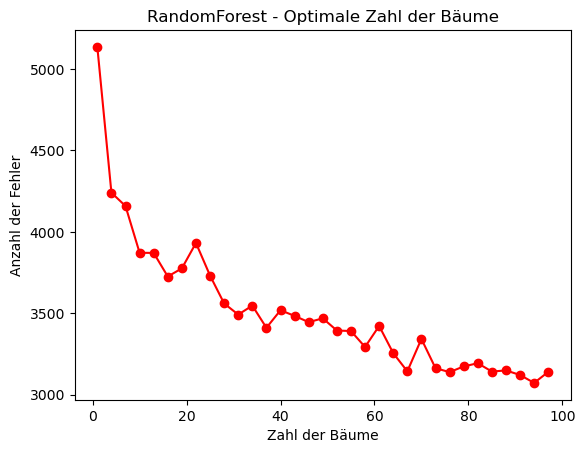

In [31]:
# Finden die optimale Anzahl der Bäume heraus
mae_scores = []
n_estimators_range = range(1, 100, 3)

for n_estimators in n_estimators_range:
    model= RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train[:100], y_train[:100])
    predictions = model.predict(X_test[:100])
    mae = mean_absolute_error(y_test[:100], predictions)
    mae_scores.append(mae)

plt.plot(n_estimators_range, mae_scores, "o-r")
plt.xlabel('Zahl der Bäume')
plt.ylabel('Anzahl der Fehler')
plt.title('RandomForest - Optimale Zahl der Bäume')
plt.show()

Ich nehme 13

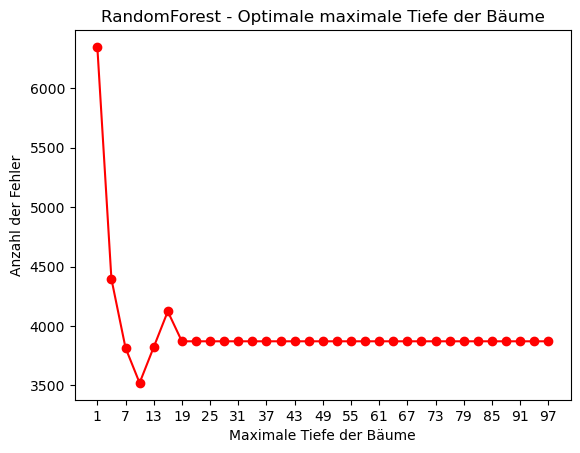

In [32]:
# Tiefe der Bäume
mae_scores = []
max_depth_range = range(1, 100, 3)

for max_depth in max_depth_range:
    model= RandomForestClassifier(n_estimators=10, max_depth=max_depth, random_state=42)
    model.fit(X_train[:100], y_train[:100])
    predictions = model.predict(X_test[:100])
    mae = mean_absolute_error(y_test[:100], predictions)
    mae_scores.append(mae)

plt.plot(max_depth_range, mae_scores, "o-r")
plt.xlabel('Maximale Tiefe der Bäume')
plt.xticks(range(1, 100, 6))
plt.ylabel('Anzahl der Fehler')
plt.title('RandomForest - Optimale maximale Tiefe der Bäume')
plt.show()

Ich nehme 7

In [33]:
rf = RandomForestClassifier(n_estimators=13, max_depth=7)

In [34]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=13)

In [92]:
predictions_rf = rf.predict(X_test)

In [93]:
mae_rf = mean_absolute_error(y_test, predictions_rf).round(2)

In [94]:
print(f"LogisticRegression hat sich durchschnittlich um {mae_lg}€ vertan und RandomForest nur um {mae_rf}€")

LogisticRegression hat sich durchschnittlich um 6411.23€ vertan und RandomForest nur um 2883.28€


In [102]:
X_test.loc[10]

mileage            82000.0
hp                   101.0
year                2011.0
make_Opel              1.0
make_Renault           0.0
make_Skoda             0.0
make_Volkswagen        0.0
Name: 10, dtype: float64

# Modell in einer Datei speichern
## um später in der Visualisierung zu benutzen

In [35]:
with open("auto_price.pkl", "wb") as file:
    pickle.dump(rf, file)

In [109]:
from joblib import dump

dump(rf, 'model.joblib')

['model.joblib']

In [111]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\natal\anaconda3\lib\site-packages (1.2.1)
     ---------------------------------------- 9.2/9.2 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1



ERROR: Could not install packages due to an OSError: [WinError 5] Zugriff verweigert: 'C:\\Users\\natal\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

